# Preliminary analysis of data

## Import packages

In [1]:
pip install pyalex

Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/af/f3/fb27b3b902fc759bbca3f9d0336c48069c3022e57552c4b0095d997c7ea8/matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2c/8e/656f8e7cd316aa68d9824744773e90dbd71f847429d10c82001e927480a2/contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1f/80/c5ce42faa7dec3c22fe587e56e141c7416c19a13a96bd4972bf1b55cb494/fonttools-4.42.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 4.6 MB/s eta 0:00:00
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/4a/fe/23d7fa78f7c66086d196406beb1fb2eaf629dd7adc01c3453033303d17fa/kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtai

In [339]:
import pyalex
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
from itertools import chain
import pandas as pd 
from matplotlib import pyplot as plt

## Import data

In [5]:
%%time

physics_data=[]

query = Works().search_filter(abstract="physics") \
        .filter(type='article') \
        .filter(authorships={"institutions": {"continent": "europe"}}) \
        .filter(publication_year="2023")

for record in chain(*query.paginate(n_max=None)):
    physics_data.append(record)


CPU times: user 17 s, sys: 1.12 s, total: 18.2 s
Wall time: 3min 30s


In [106]:
data=pd.DataFrame(physics_data)

In [107]:
data.head(3)

,id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,language,primary_location,...,referenced_works_count,referenced_works,related_works,ngrams_url,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin
0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,The Forward Physics Facility at the High-Lumin...,The Forward Physics Facility at the High-Lumin...,140.10847,2023,2023-01-20,{'openalex': 'https://openalex.org/W4225725984...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,1410,"[https://openalex.org/W9098236, https://openal...","[https://openalex.org/W1965606709, https://ope...",https://api.openalex.org/works/W4225725984/ngrams,"{'Abstract': [0], 'High': [1, 141], 'energy': ...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 22}, {'year'...",2023-09-27T21:55:02.067758,2022-05-05,NaN
1,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,Advances in QED with intense background fields,Advances in QED with intense background fields,131.25186,2023,2023-04-01,{'openalex': 'https://openalex.org/W4322490984...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,921,"[https://openalex.org/W51986920, https://opena...","[https://openalex.org/W2033990039, https://ope...",https://api.openalex.org/works/W4322490984/ngrams,"{'Upcoming': [0], 'and': [1, 8, 50, 74, 79, 10...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 28}, {'year'...",2023-09-26T10:43:55.886941,2023-02-28,NaN
2,https://openalex.org/W4313018984,https://doi.org/10.1109/tnsre.2022.3226860,Physics-Informed Deep Learning for Musculoskel...,Physics-Informed Deep Learning for Musculoskel...,119.85600,2023,2023-01-01,{'openalex': 'https://openalex.org/W4313018984...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,49,"[https://openalex.org/W2031805060, https://ope...","[https://openalex.org/W112744582, https://open...",https://api.openalex.org/works/W4313018984/ngrams,"{'Musculoskeletal': [0], 'models': [1, 38], 'h...",https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2023, 'cited_by_count': 21}]",2023-09-25T14:07:35.932097,2023-01-05,pdf


## Organise data

In [213]:
data.rename(columns={'id': 'article_id'}, inplace=True)

In [214]:
data.columns

Index(['article_id', 'doi', 'title', 'display_name', 'relevance_score',
       'publication_year', 'publication_date', 'ids', 'language',
       'primary_location', 'type', 'type_crossref', 'open_access',
       'authorships', 'countries_distinct_count',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid',
       'is_authors_truncated', 'has_fulltext', 'cited_by_count', 'biblio',
       'is_retracted', 'is_paratext', 'concepts', 'mesh', 'locations_count',
       'locations', 'best_oa_location', 'sustainable_development_goals',
       'grants', 'referenced_works_count', 'referenced_works', 'related_works',
       'ngrams_url', 'abstract_inverted_index', 'cited_by_api_url',
       'counts_by_year', 'updated_date', 'created_date', 'fulltext_origin'],
      dtype='object')

In [129]:
data.iloc[0]['primary_location']

{'is_oa': True,
 'landing_page_url': 'https://doi.org/10.1088/1361-6471/ac865e',
 'pdf_url': 'https://iopscience.iop.org/article/10.1088/1361-6471/ac865e/pdf',
 'source': {'id': 'https://openalex.org/S78376336',
  'display_name': 'Journal of Physics G',
  'issn_l': '0954-3899',
  'issn': ['1361-6471', '0954-3899'],
  'is_oa': False,
  'is_in_doaj': False,
  'host_organization': 'https://openalex.org/P4310320083',
  'host_organization_name': 'IOP Publishing',
  'host_organization_lineage': ['https://openalex.org/P4310311669',
   'https://openalex.org/P4310320083'],
  'host_organization_lineage_names': ['Institute of Physics',
   'IOP Publishing'],
  'type': 'journal'},
 'license': 'cc-by',
 'version': 'publishedVersion',
 'is_accepted': True,
 'is_published': True}

In [205]:
journal_id=[]

for i in range(len(data)):
    journal_id.append(physics_data[i]['primary_location']['source']['id'])

TypeError: 'NoneType' object is not subscriptable

In [255]:
range(len(data))

range(0, 6369)

In [256]:
type(physics_data[0]['primary_location']['source']['id'])

str

In [202]:
journal_name=[]

for i in range(len(data)):
    journal_name.append(physics_data[i]['primary_location']['source']['display_name'])

TypeError: 'NoneType' object is not subscriptable

In [204]:
abstract=[]

for i in range(len(data)):
    abstract.append(physics_data[i]['abstract'])

## Article data

In [242]:
article_data=data[['article_id', 'doi', 'publication_year', 'publication_date', 'language', 'title', 'cited_by_count', 'countries_distinct_count', 'institutions_distinct_count']]



In [216]:
article_data['abstract']=abstract

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_15556/3565299574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_data['abstract']=abstract


In [217]:
article_data

,article_id,doi,publication_year,publication_date,language,title,abstract
0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,2023,2023-01-20,en,The Forward Physics Facility at the High-Lumin...,Abstract High energy collisions at the High-Lu...
1,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,2023,2023-04-01,en,Advances in QED with intense background fields,Upcoming and planned experiments combining inc...
2,https://openalex.org/W4313018984,https://doi.org/10.1109/tnsre.2022.3226860,2023,2023-01-01,en,Physics-Informed Deep Learning for Musculoskel...,Musculoskeletal models have been widely used f...
3,https://openalex.org/W4292258795,https://doi.org/10.1109/twc.2022.3196834,2023,2023-01-01,en,PhysFad: Physics-Based End-to-End Channel Mode...,Programmable radio environments parametrized b...
4,https://openalex.org/W3034789704,https://doi.org/10.1098/rsta.2022.0050,2023,2023-06-05,en,"DreamCoder: growing generalizable, interpretab...",Expert problem-solving is driven by powerful l...
...,...,...,...,...,...,...,...
6364,https://openalex.org/W4384575560,https://doi.org/10.22363/2224-7580-2023-2-76-80,2023,2023-12-15,en,RANDOM HILBERT SPACE AND WIENER’S INTERPRETATI...,The special representation of quantum mechanic...
6365,https://openalex.org/W4384575571,https://doi.org/10.22363/2224-7580-2023-2-154-160,2023,2023-12-15,en,CORRESPONDENCE OF HEISENBERG’S VIEWS WITH THE ...,This article is devoted to a brief analysis of...
6366,https://openalex.org/W4384575578,https://doi.org/10.22363/2224-7580-2023-2-8-22,2023,2023-12-15,en,"METAPHYSICAL TRINITY OF PHYSICS, MATHEMATICS A...","The article, firstly, draws attention to the n..."
6367,https://openalex.org/W4384575581,https://doi.org/10.22363/2224-7580-2023-2-142-153,2023,2023-12-15,en,METAPHYSICAL STATUS OF PHYSICAL LAWS,The creators of physics sought to construct it...


(array([   0.,    0.,    0.,    0.,    0., 6369.,    0.,    0.,    0.,
           0.]),
 array([2022.5, 2022.6, 2022.7, 2022.8, 2022.9, 2023. , 2023.1, 2023.2,
        2023.3, 2023.4, 2023.5]),
 <BarContainer object of 10 artists>)

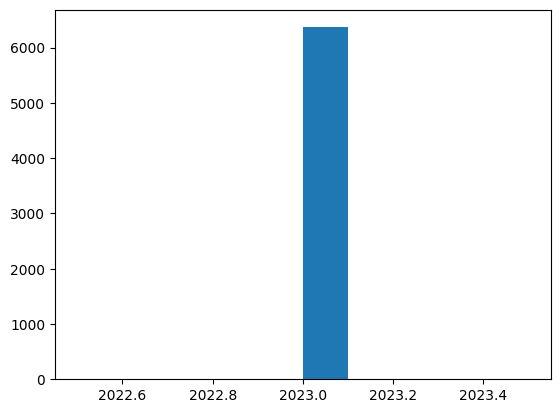

In [209]:
plt.hist(article_data['publication_year'])

## Author data

In [218]:
author_data=data[['article_id', 'doi']]

In [219]:
data.iloc[0]['authorships']

[{'author_position': 'first',
  'author': {'id': 'https://openalex.org/A5010493054',
   'display_name': 'Jonathan L. Feng',
   'orcid': 'https://orcid.org/0000-0002-7713-2138'},
  'institutions': [{'id': 'https://openalex.org/I204250578',
    'display_name': 'University of California, Irvine',
    'ror': 'https://ror.org/04gyf1771',
    'country_code': 'US',
    'type': 'education',
    'lineage': ['https://openalex.org/I204250578',
     'https://openalex.org/I2803209242']}],
  'countries': ['US'],
  'is_corresponding': False,
  'raw_author_name': 'Jonathan L Feng',
  'raw_affiliation_string': 'Department of Physics and Astronomy, University of California, Irvine, CA 92697-4575, United States of America',
  'raw_affiliation_strings': ['Department of Physics and Astronomy, University of California, Irvine, CA 92697-4575, United States of America']},
 {'author_position': 'middle',
  'author': {'id': 'https://openalex.org/A5086121104',
   'display_name': 'Felix Kling',
   'orcid': 'https:

In [ ]:
first_authour

In [321]:
len(data.iloc[0]['authorships'])

100

In [274]:
data.iloc[2]['authorships'][0]['author_position']

'first'

In [275]:
physics_data[i]['authorships'][0]['author_position']

'first'

In [276]:
first=[]

for i in range(len(data)):
    first.append(physics_data[i]['authorships'][0]['author_position'])

In [280]:
pd.DataFrame(first).value_counts()

first    6369
Name: count, dtype: int64

In [300]:
physics_data[0]['authorships'][0]

{'author_position': 'first',
 'author': {'id': 'https://openalex.org/A5010493054',
  'display_name': 'Jonathan L. Feng',
  'orcid': 'https://orcid.org/0000-0002-7713-2138'},
 'institutions': [{'id': 'https://openalex.org/I204250578',
   'display_name': 'University of California, Irvine',
   'ror': 'https://ror.org/04gyf1771',
   'country_code': 'US',
   'type': 'education',
   'lineage': ['https://openalex.org/I204250578',
    'https://openalex.org/I2803209242']}],
 'countries': ['US'],
 'is_corresponding': False,
 'raw_author_name': 'Jonathan L Feng',
 'raw_affiliation_string': 'Department of Physics and Astronomy, University of California, Irvine, CA 92697-4575, United States of America',
 'raw_affiliation_strings': ['Department of Physics and Astronomy, University of California, Irvine, CA 92697-4575, United States of America']}

In [317]:
physics_data[0]['authorships'][0]['institutions'][0]['display_name']

'University of California, Irvine'

In [327]:
total_author_counts=[]

for i in range(len(data)):
    total_author_counts.append(len(physics_data[i]['authorships']))

author_data['total_author_counts']=total_author_counts

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_15556/3090710706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['total_author_counts']=total_author_counts


In [328]:
first_author_id=[]

for i in range(len(data)):
    first_author_id.append(physics_data[i]['authorships'][0]['author']['id'])

author_data['first_author_id']=first_author_id

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_15556/426776155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_id']=first_author_id


In [329]:
first_author_name=[]

for i in range(len(data)):
    first_author_name.append(physics_data[i]['authorships'][0]['raw_author_name'])

author_data['first_author_name']=first_author_name

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_15556/219332215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_name']=first_author_name


In [330]:
first_author_country=[]

for i in range(len(data)):
    first_author_country.append(physics_data[i]['authorships'][0]['countries'])

author_data['first_author_country']=first_author_country

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_15556/901020804.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_data['first_author_country']=first_author_country


In [331]:
first_author_institution_id=[]

for i in range(len(data)):
    first_author_institution_id.append(physics_data[i]['authorships'][0]['institutions'][0]['id'])

author_data['first_author_institution_id']=first_author_institution_id

IndexError: list index out of range

In [332]:
first_author_institution_name=[]

for i in range(len(data)):
    first_author_institution_name.append(physics_data[i]['authorships'][0]['institutions'][0]['display_name'])

author_data['first_author_institution_name']=first_author_institution_name

IndexError: list index out of range

In [333]:
author_data

,article_id,doi,total_author_counts,first_author_id,first_author_name,first_author_country
0,https://openalex.org/W4225725984,https://doi.org/10.1088/1361-6471/ac865e,100,https://openalex.org/A5010493054,Jonathan L Feng,[US]
1,https://openalex.org/W4322490984,https://doi.org/10.1016/j.physrep.2023.01.003,7,https://openalex.org/A5013958581,A. Fedotov,[RU]
2,https://openalex.org/W4313018984,https://doi.org/10.1109/tnsre.2022.3226860,7,https://openalex.org/A5025336947,Jie Zhang,[GB]
3,https://openalex.org/W4292258795,https://doi.org/10.1109/twc.2022.3196834,6,https://openalex.org/A5007529571,Rashid Faqiri,[FR]
4,https://openalex.org/W3034789704,https://doi.org/10.1098/rsta.2022.0050,9,https://openalex.org/A5009201646,Kevin Ellis,[US]
...,...,...,...,...,...,...
6364,https://openalex.org/W4384575560,https://doi.org/10.22363/2224-7580-2023-2-76-80,1,https://openalex.org/A5066352336,Yu. P. Rybakov,[RU]
6365,https://openalex.org/W4384575571,https://doi.org/10.22363/2224-7580-2023-2-154-160,1,https://openalex.org/A5048516315,I. A. Rybakova,[RU]
6366,https://openalex.org/W4384575578,https://doi.org/10.22363/2224-7580-2023-2-8-22,1,https://openalex.org/A5083235825,Yu. S. Vladimirov,"[RU, TJ]"
6367,https://openalex.org/W4384575581,https://doi.org/10.22363/2224-7580-2023-2-142-153,3,https://openalex.org/A5068609653,A. V. Burov,[]
